In [3]:
import scanpy as sc
import pandas as pd
from cellbender.remove_background.downstream import anndata_from_h5

In [44]:
# Load the data
#Intact limb
adata_in=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/intact/output_filtered.h5')
adata_in=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/intact/output.h5')
#24h data
adata_24h=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/24hpa/output_filtered.h5')
adata_24h=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/24hpa/output.h5')
#72h data
adata_72h=sc.read_10x_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/72hpa/output_filtered.h5')
adata_72h=anndata_from_h5('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/limb_regen_data/72hpa/output.h5')

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_c

In [45]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

for adata in [adata_in, adata_24h, adata_72h]:
    adata.var_names = [mapper_dict.get(x, x) if mapper_dict.get(x, x) != '.' else x for x in adata.var_names]

In [6]:
adata_in.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'PKNOX2', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592', 'NU5M',
       'COX1', 'COX1', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [46]:
#Add animal information
#Load tsv
animal_info_in=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230603_intact_soup/20230603_intact_res/clusters.tsv")
animal_info_in['status'].value_counts()

#Assign the animal info to the adata_in
animal_intact_mapper= dict(zip(animal_info_in['barcode'],animal_info_in['assignment']))
soup_doublet_mapper=dict(zip(animal_info_in['barcode'],animal_info_in['status']))
adata_in.obs['animal']=None
adata_in.obs['status']=None
for i in adata_in.obs.index:
    if i in animal_intact_mapper:
        adata_in.obs.at[i,'animal']=animal_intact_mapper[i]
    if i in soup_doublet_mapper:
        adata_in.obs.at[i,'status']=soup_doublet_mapper[i]
        
#For 24h data
animal_info_24h=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230526_24h_piecewise_soup/20230603_24h_soup_res/clusters.tsv")
animal_info_24h['status'].value_counts()
animal_24h_mapper= dict(zip(animal_info_24h['barcode'],animal_info_24h['assignment']))
soup_doublet_24h_mapper=dict(zip(animal_info_24h['barcode'],animal_info_24h['status']))
adata_24h.obs['animal']=None
adata_24h.obs['status']=None
for i in adata_24h.obs.index:
    if i in animal_24h_mapper:
        adata_24h.obs.at[i,'animal']=animal_24h_mapper[i]
    if i in soup_doublet_24h_mapper:
        adata_24h.obs.at[i,'status']=soup_doublet_24h_mapper[i]

#For 72h data
animal_info_72h=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230603_72_soup/20230603_72_res/clusters.tsv")
animal_72h_mapper= dict(zip(animal_info_72h['barcode'],animal_info_72h['assignment']))
soup_doublet_72h_mapper=dict(zip(animal_info_72h['barcode'],animal_info_72h['status']))
adata_72h.obs['animal']=None
adata_72h.obs['status']=None
for i in adata_72h.obs.index:
    if i in animal_72h_mapper:
        adata_72h.obs.at[i,'animal']=animal_72h_mapper[i]
    if i in soup_doublet_72h_mapper:
        adata_72h.obs.at[i,'status']=soup_doublet_72h_mapper[i]

In [47]:
#Preprocess the data
mt_gene_patterns = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']
mt_gene_pattern = '|'.join(mt_gene_patterns)
for adata in [adata_in, adata_24h, adata_72h]:
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    adata.var['mt'] = adata.var_names.str.match(mt_gene_pattern)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    adata = adata[adata.obs.pct_counts_mt < 10, :]
    adata = adata[adata.obs.n_genes_by_counts < 2500, :]
    adata.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

In [48]:
adata_in

AnnData object with n_obs × n_vars = 5462 × 33376
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [49]:
adata_24h

AnnData object with n_obs × n_vars = 4618 × 28183
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [50]:
adata_72h

AnnData object with n_obs × n_vars = 12716 × 32546
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [12]:
#Doublet removal
results_dict={}
#Using SCVI to identify doublets
import scvi
for adata, adata_name in [(adata_in, 'adata_in'), (adata_24h, 'adata_24h'), (adata_72h, 'adata_72h')]:
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft=False)
    results_dict[adata_name] = df

df_in = results_dict['adata_in']

/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


Epoch 400/400: 100%|██████████| 400/400 [21:58<00:00,  3.39s/it, v_num=1, train_loss_step=9.35e+3, train_loss_epoch=8.33e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [21:58<00:00,  3.30s/it, v_num=1, train_loss_step=9.35e+3, train_loss_epoch=8.33e+3]
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used

Epoch 400/400: 100%|██████████| 400/400 [01:45<00:00,  3.74it/s, v_num=1, train_loss_step=0.33, train_loss_epoch=0.368] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:45<00:00,  3.79it/s, v_num=1, train_loss_step=0.33, train_loss_epoch=0.368]


/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(


Epoch 400/400: 100%|██████████| 400/400 [16:31<00:00,  2.41s/it, v_num=1, train_loss_step=5.47e+3, train_loss_epoch=6.16e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [16:31<00:00,  2.48s/it, v_num=1, train_loss_step=5.47e+3, train_loss_epoch=6.16e+3]
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used

Epoch 205/400:  51%|█████▏    | 205/400 [00:43<00:41,  4.70it/s, v_num=1, train_loss_step=0.344, train_loss_epoch=0.288]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.292. Signaling Trainer to stop.


/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(


Epoch 400/400: 100%|██████████| 400/400 [51:57<00:00,  7.47s/it, v_num=1, train_loss_step=6.23e+3, train_loss_epoch=5.62e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [51:57<00:00,  7.79s/it, v_num=1, train_loss_step=6.23e+3, train_loss_epoch=5.62e+3]
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used

Epoch 400/400: 100%|██████████| 400/400 [03:57<00:00,  1.72it/s, v_num=1, train_loss_step=0.405, train_loss_epoch=0.321]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:57<00:00,  1.69it/s, v_num=1, train_loss_step=0.405, train_loss_epoch=0.321]


In [51]:
df_in

,doublet,singlet,prediction
AGAACCTGTGTTTACG-1,3.893573,-3.670197,doublet
AGGAAATCAGGCATGA-1,1.610527,-1.972708,doublet
TCTCTGGCAACAAGAT-1,0.820176,-0.687294,doublet
CACCAAACAACTGCTA-1,1.641453,-1.630081,doublet
CATGCCTCAACCCGCA-1,2.305526,-2.209062,doublet
...,...,...,...
TCTCACGTCGATTCCC-1,-3.280690,2.679593,singlet
CATGGTAAGCAGGCAT-1,-3.197474,3.002325,singlet
CGATGGCCAAGGAGTC-1,-3.479144,3.511574,singlet
TTCTCTCTCGGACTTA-1,-3.602957,3.481082,singlet


In [14]:
#Save the results_dict variable
#import pickle
#with open('results_dict.pickle', 'wb') as handle:
#    pickle.dump(results_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
adata_in.obs['status'].value_counts()

status
singlet       5181
unassigned     169
doublet         86
Name: count, dtype: int64

In [21]:
results_dict['adata_in']['prediction'].value_counts()

prediction
singlet    3780
doublet    1682
Name: count, dtype: int64

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


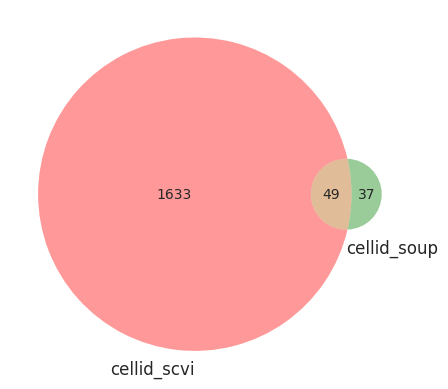

In [52]:
#Remove doublets
#ADD both the doublet objects to create a new one
adata_in_dob = adata_in[(adata_in.obs['status'] == 'doublet') ]
cellid_soup=adata_in_dob.obs.index
cellid_scvi=results_dict['adata_in'].loc[results_dict['adata_in']['prediction'] == 'doublet'].index
common_elements = set(cellid_scvi).intersection(cellid_soup)
cellid_scvi = set(cellid_scvi)
cellid_soup = set(cellid_soup)
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
venn2([cellid_scvi, cellid_soup], ('cellid_scvi', 'cellid_soup'))
doublets= cellid_scvi.union(cellid_soup)
doublets=list(doublets)

In [53]:
doublets_in_adata_in = list(set(doublets).intersection(adata_in.obs_names))
adata_in.obs.loc[doublets_in_adata_in, 'status'] = 'doublet'

In [54]:
adata_in.obs['status'].value_counts()

status
singlet       3553
doublet       1719
unassigned     164
Name: count, dtype: int64

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


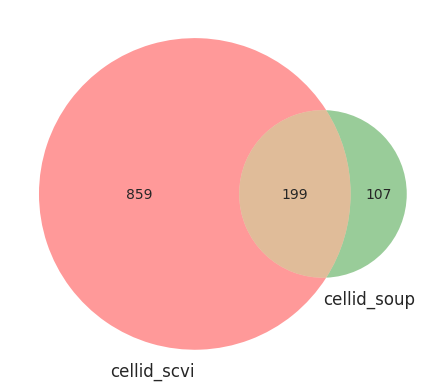

In [55]:
#Remove doublets for 24h data
adata_24h_dob = adata_24h[(adata_24h.obs['status'] == 'doublet') ]
cellid_soup=adata_24h_dob.obs.index
cellid_scvi=results_dict['adata_24h'].loc[results_dict['adata_24h']['prediction'] == 'doublet'].index
common_elements = set(cellid_scvi).intersection(cellid_soup)
cellid_scvi = set(cellid_scvi)
cellid_soup = set(cellid_soup)
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
venn2([cellid_scvi, cellid_soup], ('cellid_scvi', 'cellid_soup'))
doublets= cellid_scvi.union(cellid_soup)
doublets=list(doublets)
doublets_in_adata_24h = list(set(doublets).intersection(adata_24h.obs_names))
adata_24h.obs.loc[doublets_in_adata_24h, 'status'] = 'doublet'

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


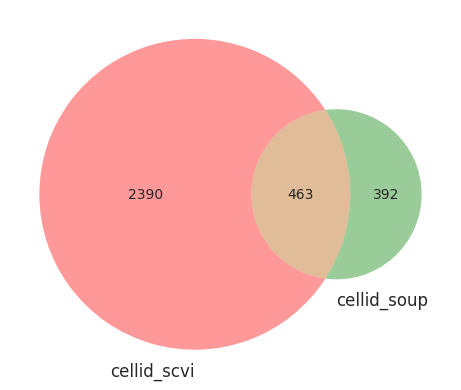

In [56]:
#Remove Doublets for 72h data
adata_72h_dob = adata_72h[(adata_72h.obs['status'] == 'doublet') ]
cellid_soup=adata_72h_dob.obs.index
cellid_scvi=results_dict['adata_72h'].loc[results_dict['adata_72h']['prediction'] == 'doublet'].index
common_elements = set(cellid_scvi).intersection(cellid_soup)
cellid_scvi = set(cellid_scvi)
cellid_soup = set(cellid_soup)
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
venn2([cellid_scvi, cellid_soup], ('cellid_scvi', 'cellid_soup'))
doublets= cellid_scvi.union(cellid_soup)
doublets=list(doublets)
doublets_in_adata_72h = list(set(doublets).intersection(adata_72h.obs_names))
adata_72h.obs.loc[doublets_in_adata_72h, 'status'] = 'doublet'

In [57]:
#Subset all the datasets
adata_in = adata_in[adata_in.obs['status'] == 'singlet']
adata_24h = adata_24h[adata_24h.obs['status'] == 'singlet']
adata_72h = adata_72h[adata_72h.obs['status'] == 'singlet']

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [58]:
#Remove doublets
adata_in

View of AnnData object with n_obs × n_vars = 3553 × 33376
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [59]:
adata_24h

View of AnnData object with n_obs × n_vars = 3208 × 28183
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [60]:
adata_72h

View of AnnData object with n_obs × n_vars = 8696 × 32546
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'animal', 'status', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


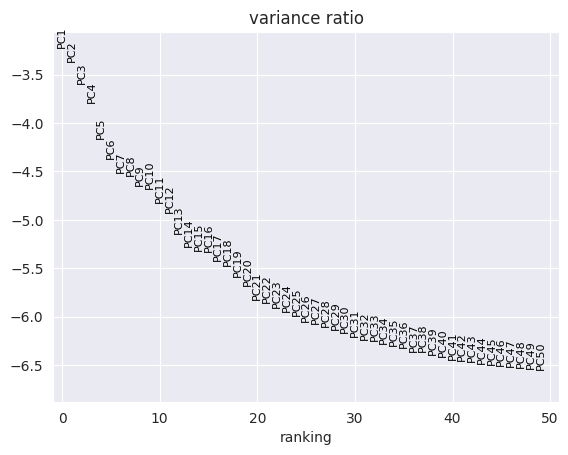

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


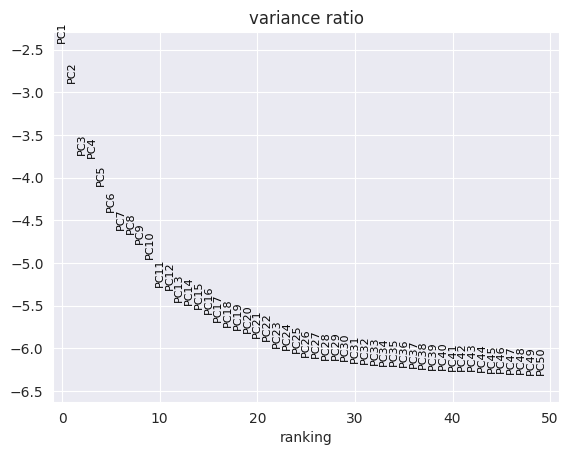

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


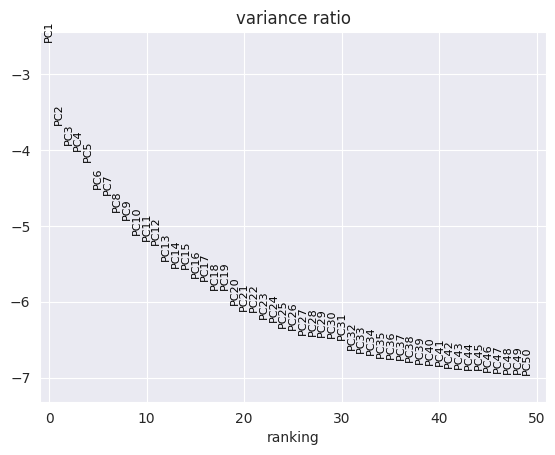

In [61]:
#Preprocess the data
for adata in [adata_in, adata_24h, adata_72h]:
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_variance_ratio(adata, log=True,n_pcs=50)

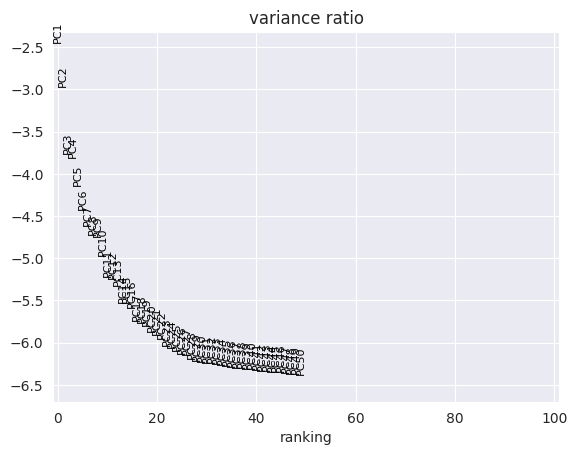

In [45]:
sc.pl.pca_variance_ratio(adata_24h, log=True,n_pcs=100)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


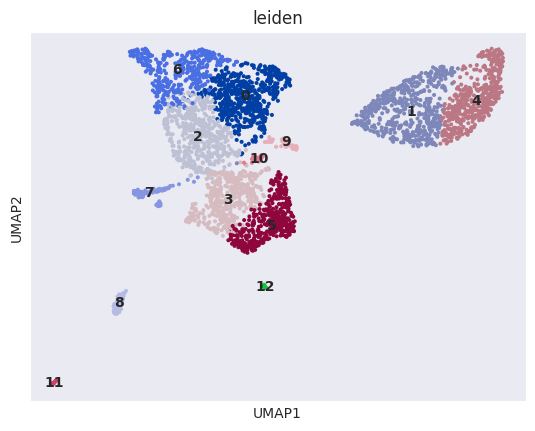

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


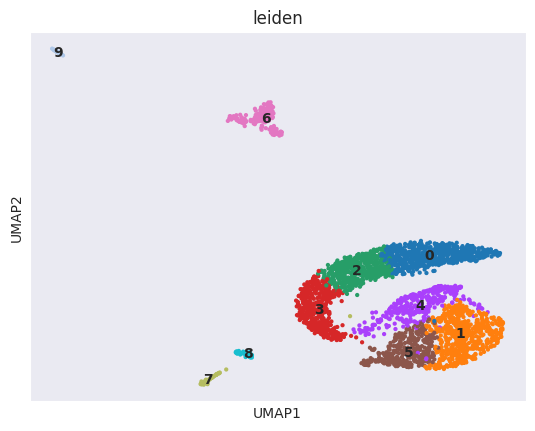

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


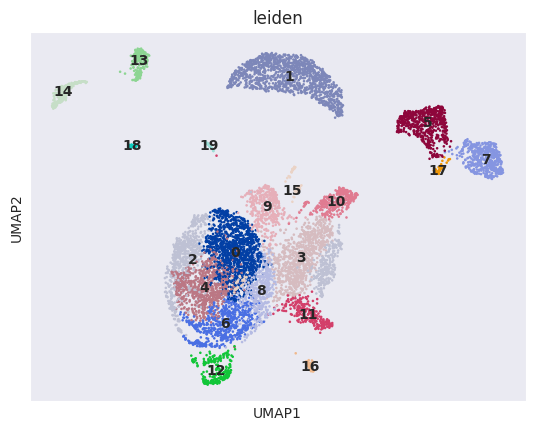

In [121]:
#Run UMAP
for adata in [adata_in, adata_24h, adata_72h]:
    sc.pp.neighbors(adata, n_neighbors=50, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata,resolution=0.5)
    sc.pl.umap(adata, color=['leiden'],legend_loc='on data')

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

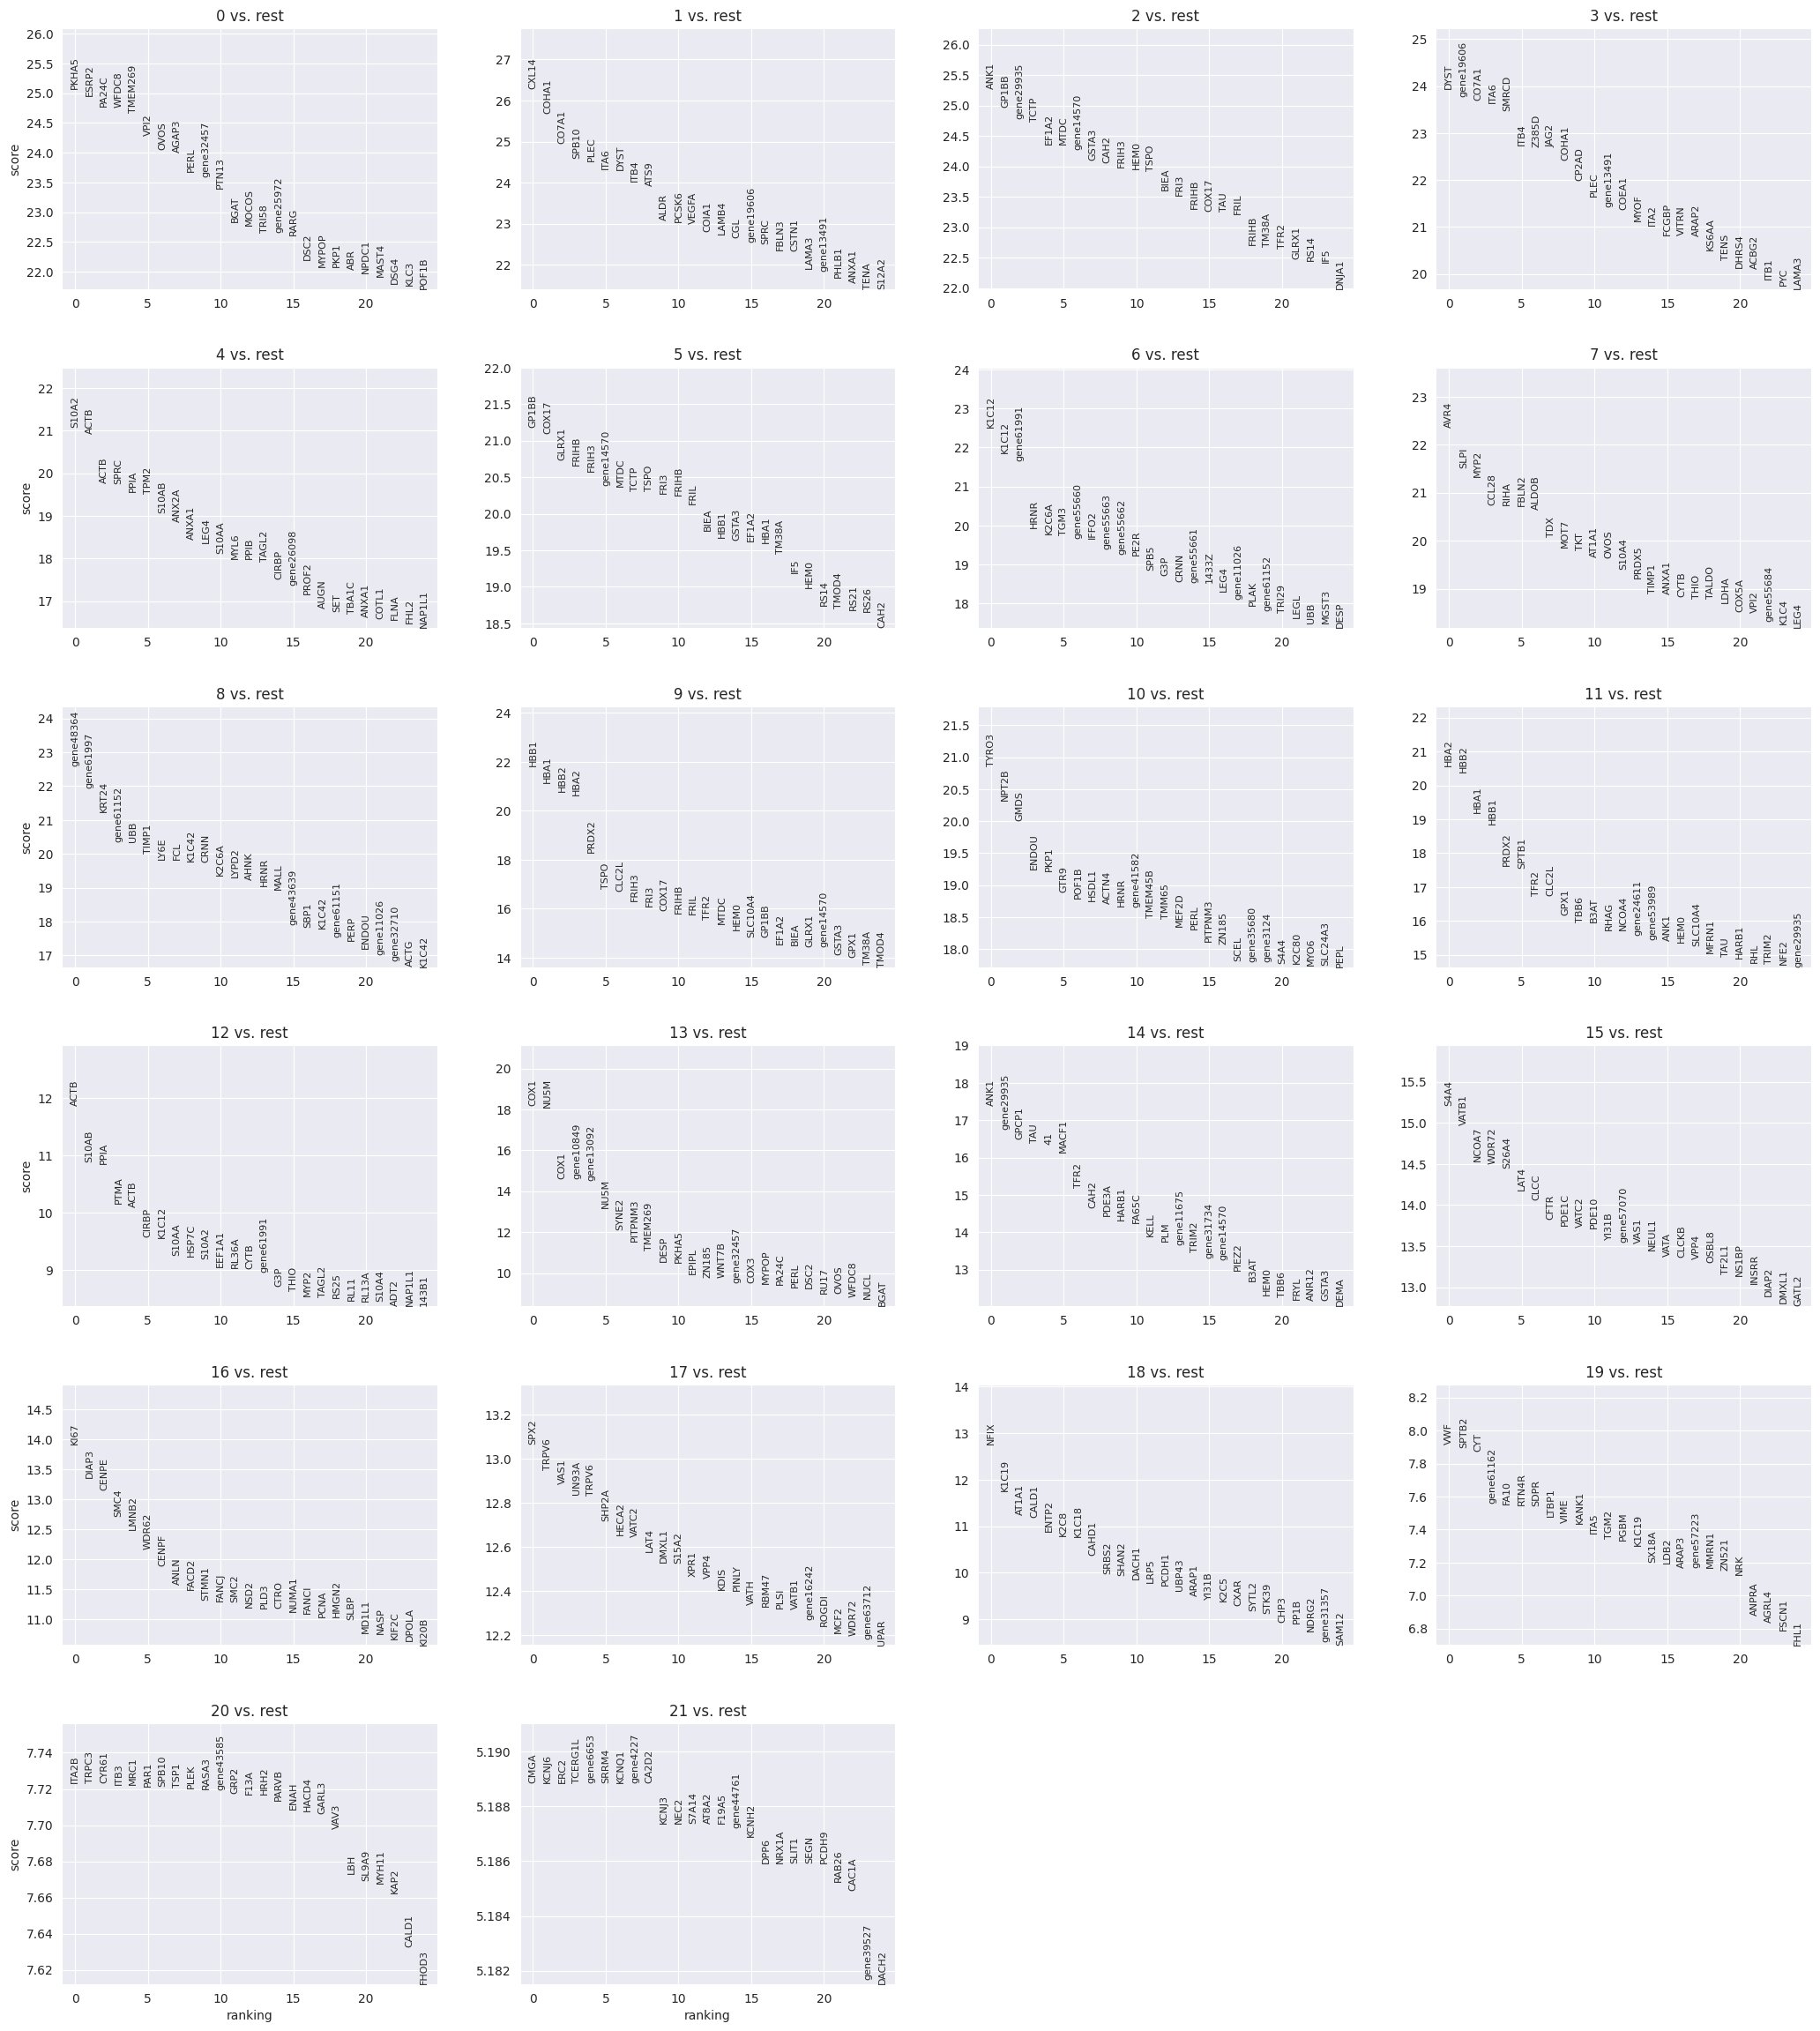

In [63]:
#DE analysis for intact limb
sc.tl.rank_genes_groups(adata_in, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_in, n_genes=25, sharey=False)


/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

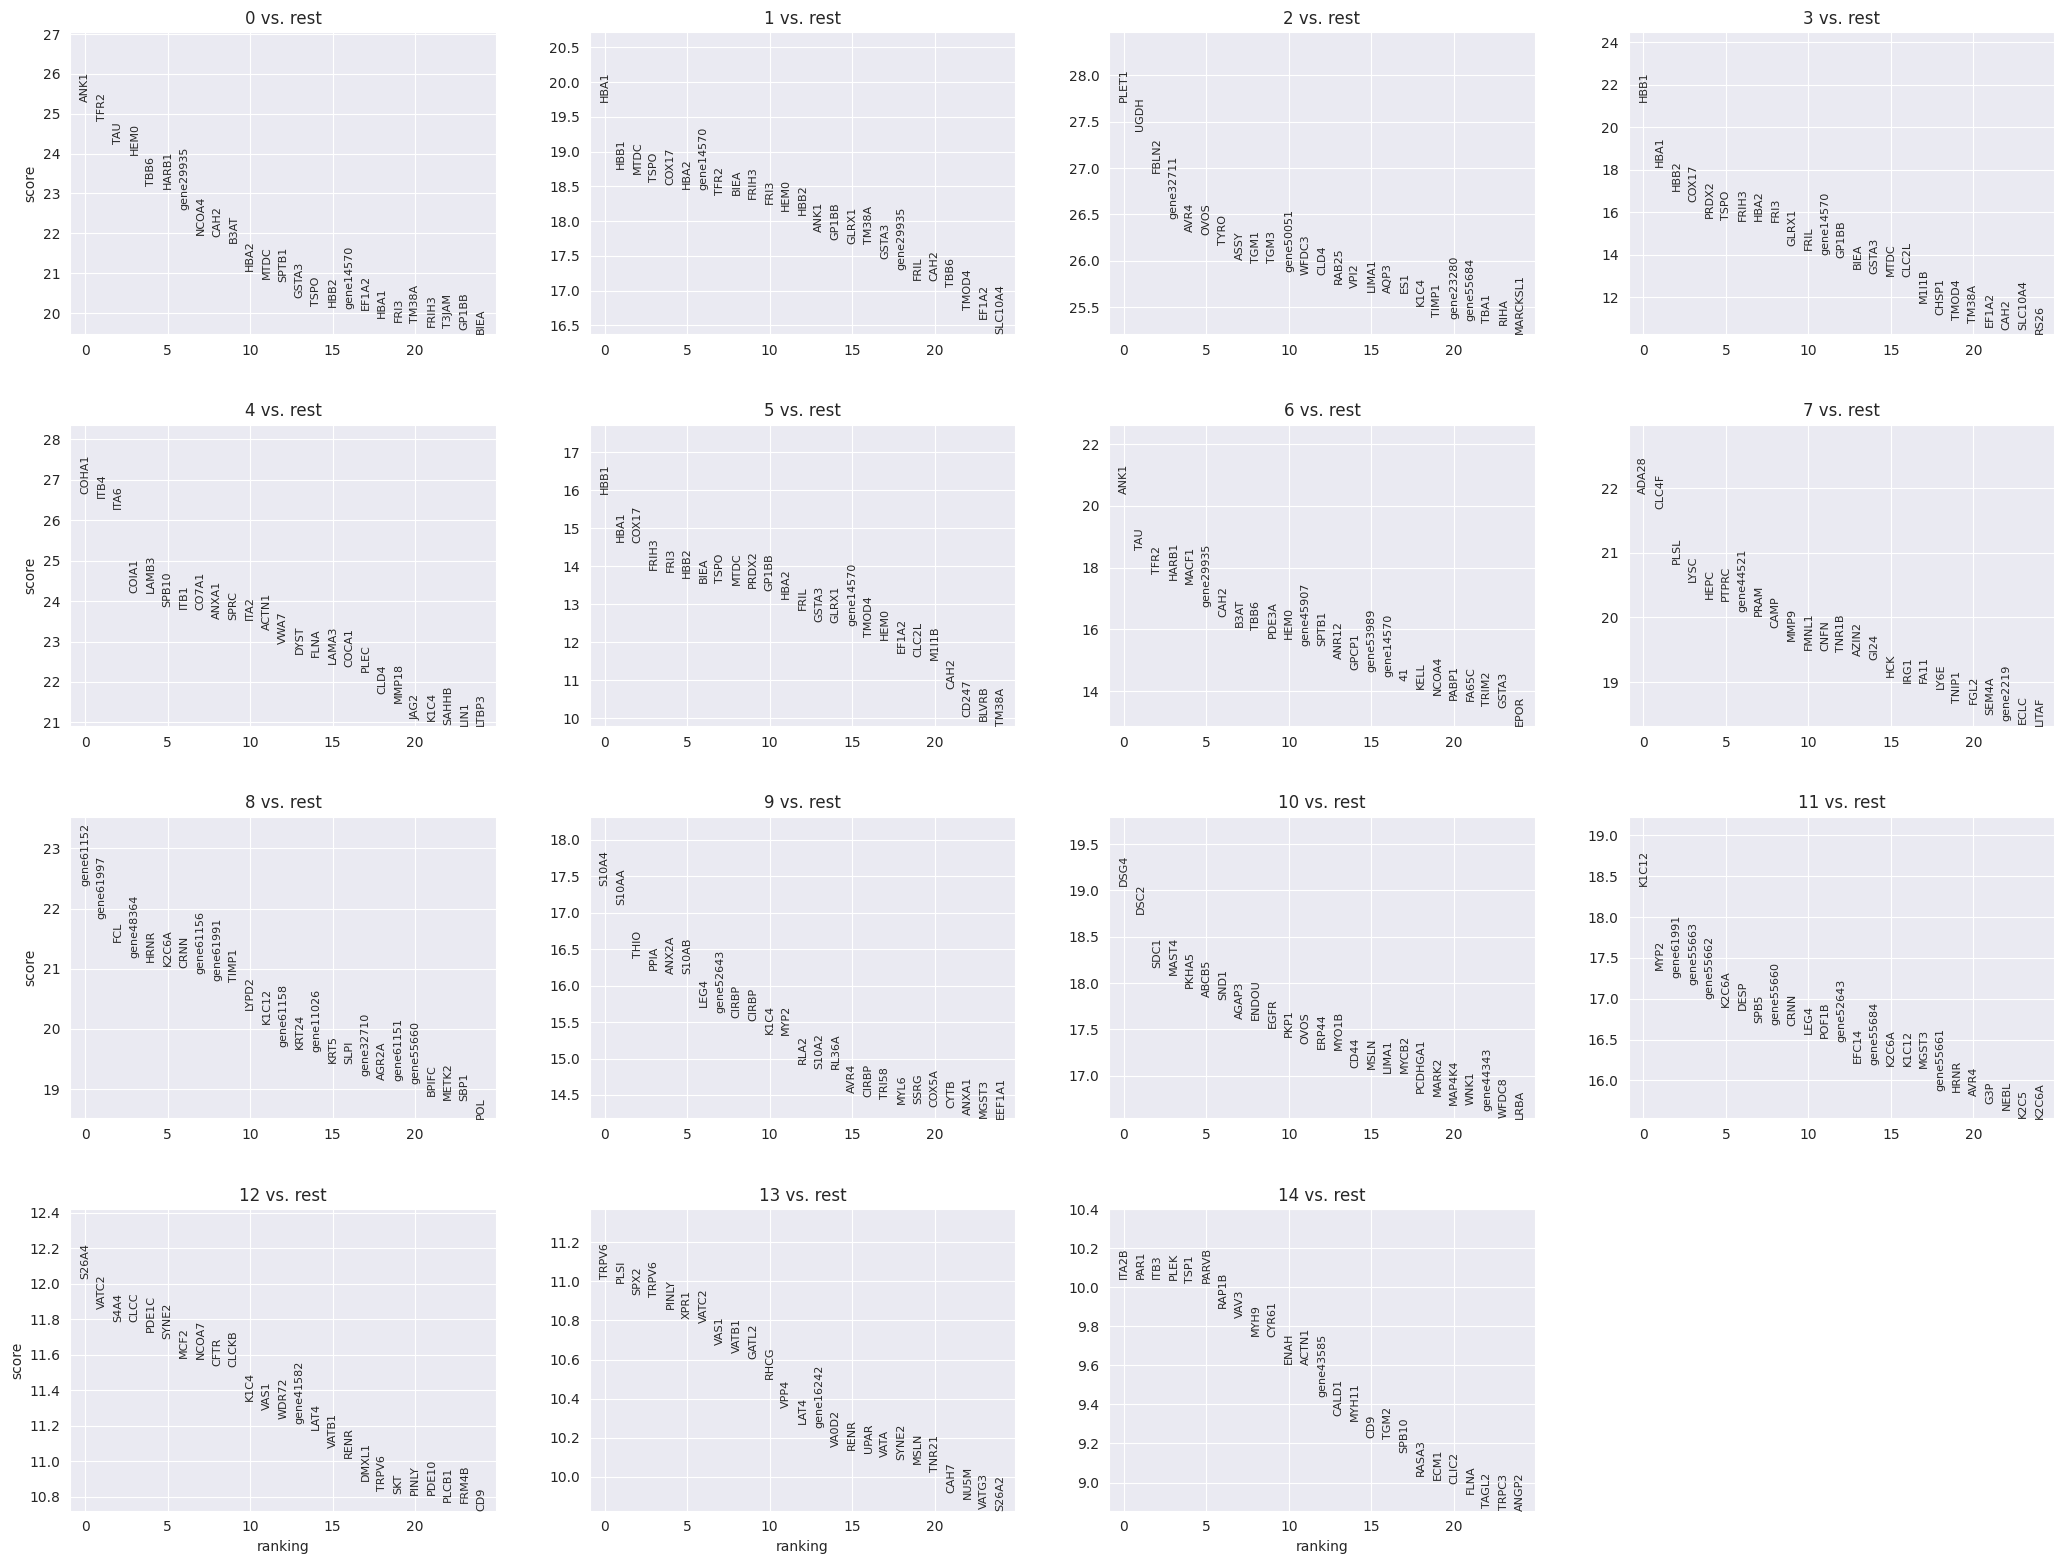

In [64]:
#DE analysis for 24h data
sc.tl.rank_genes_groups(adata_24h, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_24h, n_genes=25, sharey=False)

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

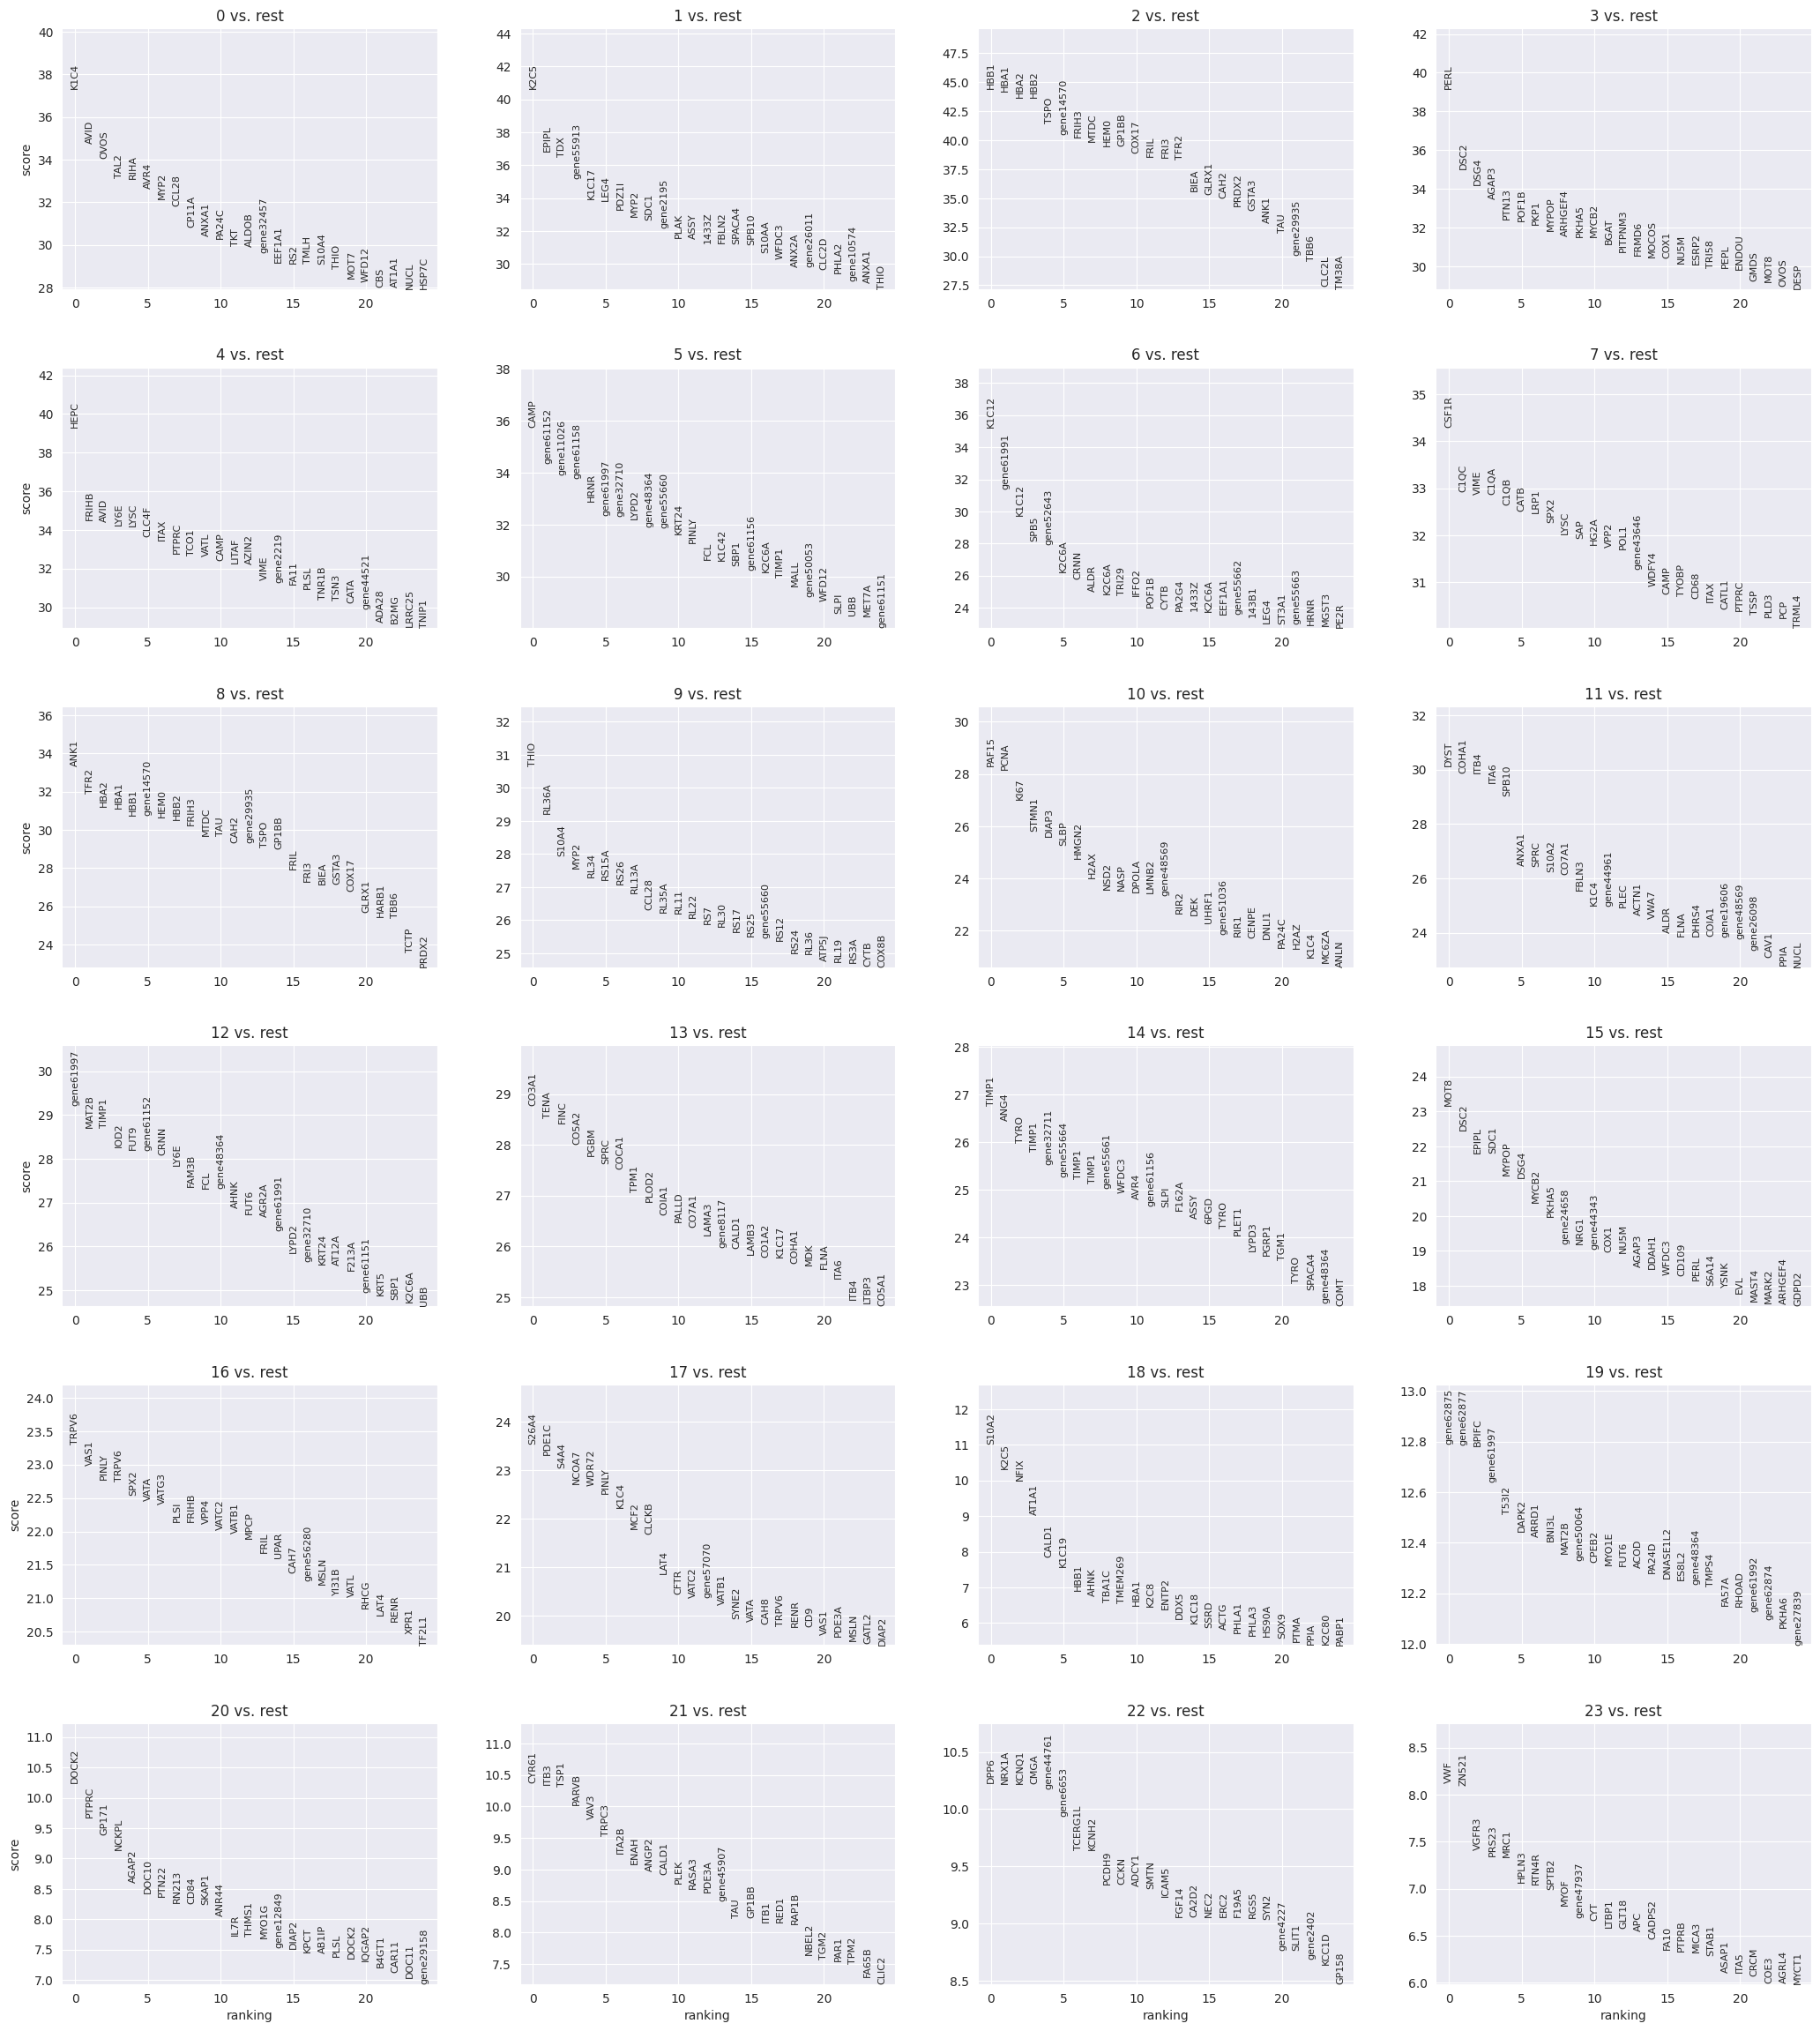

In [65]:
#DE analysis for 72h data
sc.tl.rank_genes_groups(adata_72h, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_72h, n_genes=25, sharey=False)

,Gene,scores,pval_adj,lfc,cluster
0,PKHA5,25.078997,0.0,NaN,0
1,ESRP2,24.954184,0.0,NaN,0
2,PA24C,24.781343,0.0,NaN,0
3,WFDC8,24.766645,0.0,NaN,0
4,TMEM269,24.669945,0.0,NaN,0
...,...,...,...,...,...
33371,RL18,-19.884644,0.0,NaN,0
33372,RL13,-19.910639,0.0,NaN,0
33373,TCTP,-20.244675,0.0,NaN,0
33374,FRIHB,-20.445118,0.0,NaN,0


OrderedDict([('cell_size_lognormal_std', array(0.02601682)),
             ('empty_droplet_size_lognormal_loc', array(6.39816809)),
             ('empty_droplet_size_lognormal_scale', array(0.00984483)),
             ('swapping_fraction_dist_params',
              array([  1.25688398, 237.22434998])),
             ('estimator', array([b'mckp'], dtype='|S4')),
             ('features_analyzed_inds',
              array([    3,     8,    16, ..., 65593, 65594, 65595])),
             ('fraction_data_used_for_testing', array([0.1])),
             ('learning_curve_learning_rate_epoch',
              array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                      14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
                      27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
                      40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
                      53,  54,  55,  56,  57,  58,  59,  60,  61,  62

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


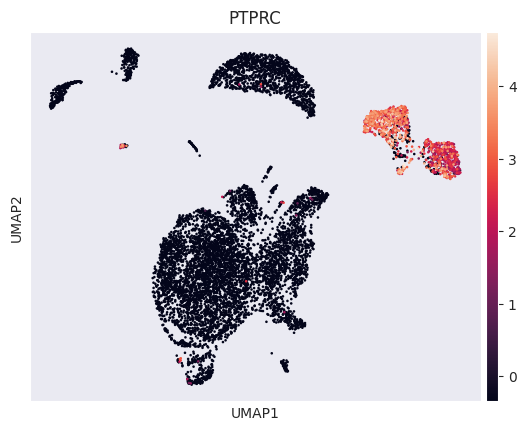

In [120]:
for i in adata_in.var_names:
    if i.startswith('LPA'):
        print(i)

LPA11
LPAR3
LPAR4
LPAR6
LPAR5
LPAR6
